# Recruitment Interview Screening Model 

### Scenario:
- Company has interviewed and tested over 300 candidates and based on their scores has given them interviews. 
- Using this data, they wish to create a prediction tool that can then sort candidates into whether or not they're called into an interivew with high accuracy. 
- The model should show minimal bias.


#### This dataset includes 12 features:

- Gender (M, F) and Age
- years_of_experience - (float64) Number of years of experience the candidate has had relevant for this role
    - Note, this variable has been min-max normalised. The original values range from 0 - 15.
        - E.g., values of 0.2, 0.5, 0.667, 1 = 3yrs, 7.5yr, and 10yrs respectively.
- functional_competency_score - (float64) A score representing the candidate's functional competency based on a test
- top1_skills_score - (float64) Score of the most valuable skill for the role 
- top2_skills_score - (float64) Score of the second most valuable for the role
- top3_skills_score - (float64) Score of the third most valuable for the role
- behavior_competency_score - (float64) A score representing the candidate's behavior competency derived from a HR test
- top1_behavior_skill_score - (float64) Score of the most valuable behavior skill for the role
- top2_behavior_skill_score - (float64) Score of the second most valuable behavior skill for the role
- top3_behavior_skill_score - (float64) Score of the third most valuable behavior skill for the role
- call_for_interview - (0 or 1) Binary variable indicating if the candidate was called for an interview or not

### My plan of attack:
- Inspect the data:
    - Check for missing or incorrect values. Drop these values. 
    - Check the distributions to ensure they're normally distributed. Perform necessary transformations.
    - Feature importance. Are these "top skills" really top skills? I'll check through 3 - 4 methods to ensure that they're not redundant. 
- Model training:
    - Ensuring good model fit with high accuracy. Let's say 85% is a good benchmark. We won't go to testing unless it's at least 85%. This might need some tweaking in the features. Over 95% could be problematic and indicate overfitting.
- Model testing. 
    - I'll aim for a balance by looking at F1 scores. And look for signs of overfitting (such as significant model performance drop from train to test)
- Iteration. 
    - Based on testing/training model evaluation, I'll consider different logistical regression hyperparamaters like regularisation strength (C) or penalty types (L1/L2) and see if these tweaks can help. 

## Packages and Data

In [1]:
#import packages, set seaborn as default graphics output for visuals
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression

In [2]:
#load the datasets
data_raw = pd.read_csv('dataset_recruitment.csv')

In [3]:
#inspect the data elements and formatting
data_raw.head()

,gender,age,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,F,35,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,F,47,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,M,59,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,F,36,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,F,32,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


If this ML model is going to be de-biased, with my domain knowledge of recruitment and selection - Gender and Age features will be ommitted without any reservation. In fact, we could quickly do a check later to see if Age/Gender did have any influence on the outcome, and make corrections based on this.  

# Data Inspection

In [4]:
data_raw.describe(include='all')

,gender,age,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
count,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,44.263333,0.231778,0.578350,0.681111,0.510667,0.521667,0.457692,0.480880,0.434732,0.426792,0.530000
std,NaN,9.456147,0.238689,0.156784,0.238006,0.229482,0.230523,0.260942,0.244018,0.225863,0.248246,0.499933
min,NaN,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,36.000000,0.000000,0.480041,0.527778,0.300000,0.300000,0.230769,0.297052,0.249501,0.224828,0.000000
50%,NaN,44.000000,0.200000,0.576121,0.666667,0.500000,0.500000,0.358974,0.433097,0.401338,0.389711,1.000000
75%,NaN,53.000000,0.400000,0.685611,0.888889,0.700000,0.700000,0.666667,0.687145,0.612519,0.632039,1.000000


## Feature Scatterplots:

### Years of Experience

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='years_of_experience', ylabel='Count'>

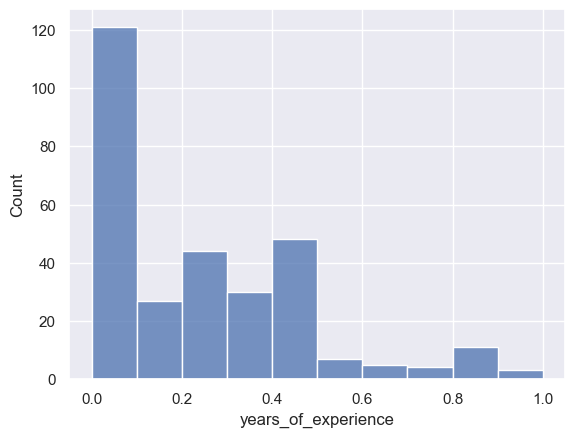

In [5]:
sns.histplot(data_raw['years_of_experience'])

### Competency

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='functional_competency_score', ylabel='Count'>

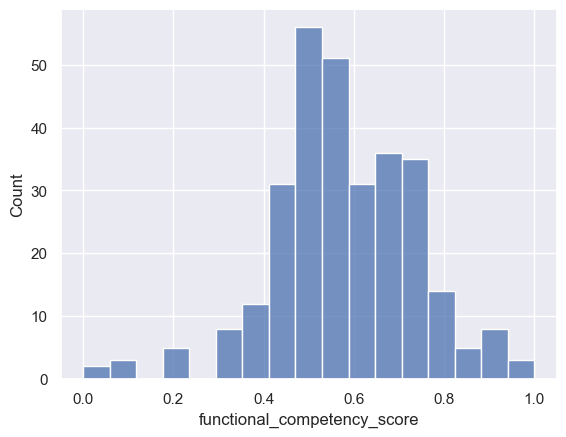

In [6]:
sns.histplot(data_raw['functional_competency_score'])

### Skills 1, 2, 3

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='top1_skills_score', ylabel='Count'>

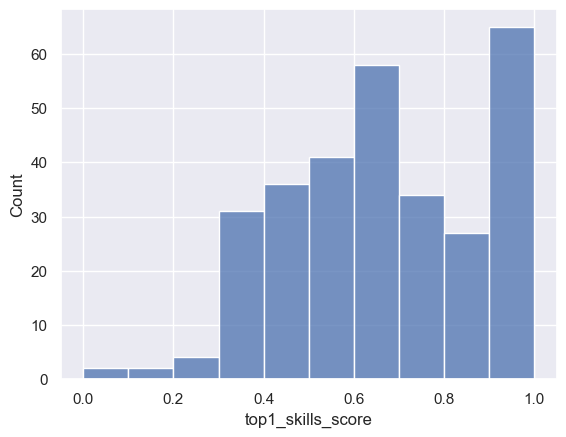

In [7]:
sns.histplot(data_raw['top1_skills_score'])

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='top2_skills_score', ylabel='Count'>

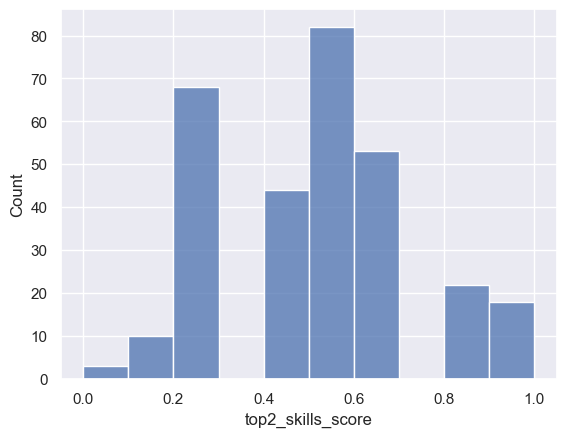

In [8]:
sns.histplot(data_raw['top2_skills_score'])

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='top3_skills_score', ylabel='Count'>

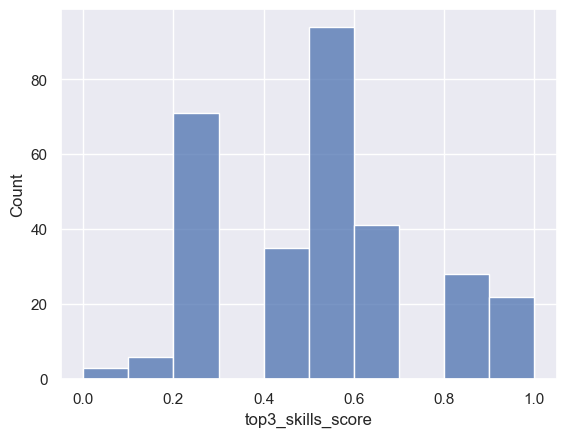

In [9]:
sns.histplot(data_raw['top3_skills_score'])

### Behavioural Competency

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='behavior_competency_score', ylabel='Count'>

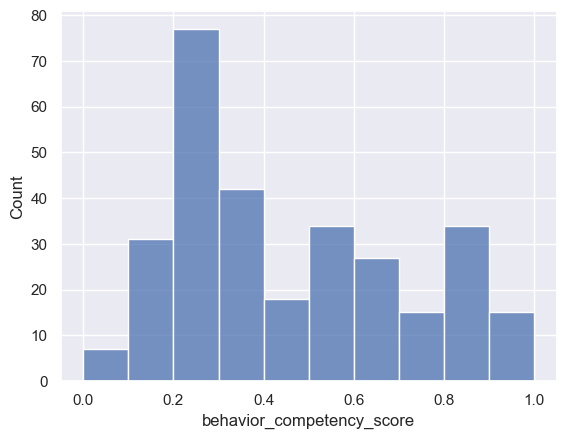

In [10]:
sns.histplot(data_raw['behavior_competency_score'])

### Behavioural Skills 1, 2, 3

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='top1_behavior_skill_score', ylabel='Count'>

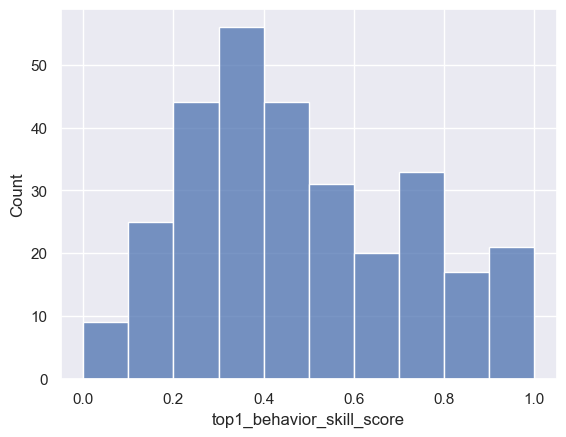

In [11]:
sns.histplot(data_raw['top1_behavior_skill_score'])

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='top2_behavior_skill_score', ylabel='Count'>

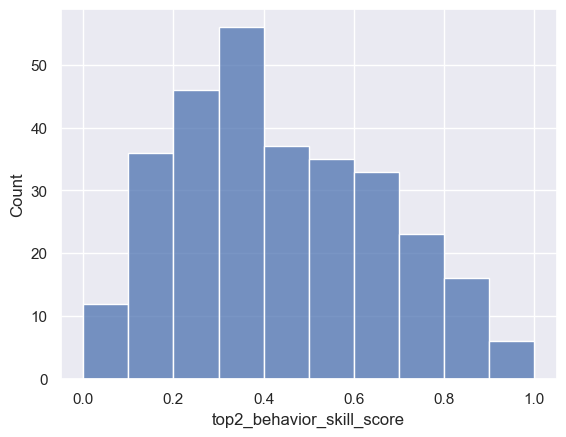

In [12]:
sns.histplot(data_raw['top2_behavior_skill_score'])

C:\Users\stefe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='top3_behavior_skill_score', ylabel='Count'>

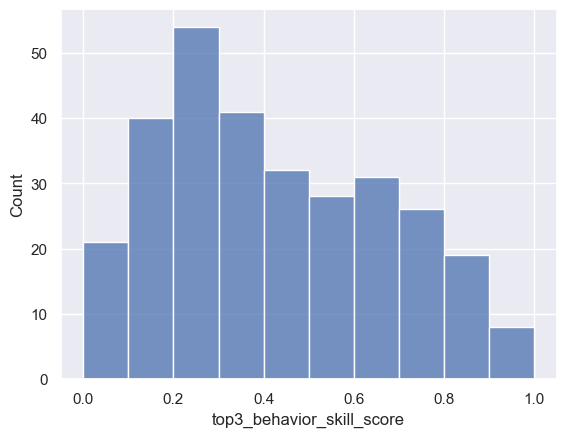

In [13]:
sns.histplot(data_raw['top3_behavior_skill_score'])

# Assumption Checks

## Hard Data for Skewness / Kurtosis

In [14]:
from scipy.stats import skew, kurtosis

In [15]:
numeric_data = data_raw.select_dtypes(include=['number']) #sort the data by numeric values only

skewness_values = numeric_data.apply(lambda x: skew(x.dropna()))
kurtosis_values = numeric_data.apply(lambda x: kurtosis(x.dropna())) #calculate skew/kurt for each variable

skew_kurtosis_df = pd.DataFrame({'Skewness': skewness_values, 'Kurtosis': kurtosis_values}) #dataframe to hold values

skew_kurtosis_df

,Skewness,Kurtosis
age,-0.130674,-1.236660
years_of_experience,1.021283,0.488163
functional_competency_score,-0.314368,1.176482
top1_skills_score,-0.216341,-0.781972
top2_skills_score,0.188439,-0.478775
top3_skills_score,0.185728,-0.544276
behavior_competency_score,0.493528,-1.040380
top1_behavior_skill_score,0.345357,-0.818494
top2_behavior_skill_score,0.351795,-0.778332
top3_behavior_skill_score,0.363761,-0.951686


Interpretation:
- All values are in the acceptable range for logistic regression

Solution:
- No transformations are required to the data

## Multicollinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_raw[['years_of_experience','functional_competency_score','top1_skills_score','top2_skills_score','top3_skills_score','behavior_competency_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score']] #checking features that make sense, our categorical won't have this issue
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,years_of_experience,7.175684
1,functional_competency_score,29.421135
2,top1_skills_score,21.835263
3,top2_skills_score,13.854919
4,top3_skills_score,15.096161
5,behavior_competency_score,55.919032
6,top1_behavior_skill_score,36.246421
7,top2_behavior_skill_score,33.475523
8,top3_behavior_skill_score,28.356903


Interpretation:
- These results indicate a disasterously high amount of multicollinearity in the feature data.
- These results make a lot of sense. Job interview selection criteria are highly clustered, especially when looking at certain attributes, such as skills, behaviourals, and attributes. 

Possible solutions:
- Elastic Net Logistic Regression will apply lasso and ridge penalties simultaneously to reduce multicollinearity and potentially reduce the amount of features too. 
- I could use Maximum likelihood as a comparison model, along with a Bayesian model for further context.

#### More VIF Checks:
- What if I take out the highest VIF?

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables1 = data_raw[['years_of_experience','functional_competency_score','top1_skills_score','top2_skills_score','top3_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score']] #checking features that make sense, our categorical won't have this issue
vif = pd.DataFrame()
vif["Features"] = variables1.columns
vif["VIF"] = [variance_inflation_factor(variables1.values, i) for i in range(variables1.shape[1])]
vif

,Features,VIF
0,years_of_experience,7.123194
1,functional_competency_score,21.367815
2,top1_skills_score,20.212830
3,top2_skills_score,12.907910
4,top3_skills_score,14.920887
5,top1_behavior_skill_score,29.211936
6,top2_behavior_skill_score,28.094138
7,top3_behavior_skill_score,22.392163


Interpretation:
- Taking out just the behavioural competency score seems to decrease most scores. In particular, the functional competency. 
- That's interesting, and indicates that the HR Recruitment team at this organisation may have done too much testing around similar skills, competencies, and behaviours, making their predictive power redundant. 

Possible solution:
- A feature evaluation tool or three could help clarify which features are most important to this model.

## Combinations VIF Analysis
with years_of_experience variable, with at least 3 variables in combination

In [18]:
from itertools import combinations # package

In [19]:
predictor_variables = ['years_of_experience', 'functional_competency_score', 'top1_skills_score',
                       'top2_skills_score', 'top3_skills_score', 'behavior_competency_score',
                       'top1_behavior_skill_score', 'top2_behavior_skill_score', 'top3_behavior_skill_score']

vif_results = pd.DataFrame(columns=['Features', 'VIF']) #dataFrame to store results

#combinations of features with 'years_of_experience' and at least 2 other features
for r in range(2, len(predictor_variables) - 1):
    for feature_combo in combinations(predictor_variables[1:], r):  # Exclude 'years_of_experience' from combinations
        feature_combo_list = ['years_of_experience'] + list(feature_combo)  # Add 'years_of_experience' to the combination
        # Calculate VIF for the current combination
        vif_values = [variance_inflation_factor(data_raw[feature_combo_list].values, i) for i in range(1, len(feature_combo_list))]
        # Append the results to the DataFrame
        vif_results = pd.concat([vif_results, pd.DataFrame({'Features': feature_combo_list[1:], 'VIF': vif_values})], ignore_index=True)

vif_results

C:\Users\stefe\AppData\Local\Temp\ipykernel_16216\2428158634.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vif_results = pd.concat([vif_results, pd.DataFrame({'Features': feature_combo_list[1:], 'VIF': vif_values})], ignore_index=True)


,Features,VIF
0,functional_competency_score,10.368504
1,top1_skills_score,13.447985
2,functional_competency_score,6.292186
3,top2_skills_score,9.375428
4,functional_competency_score,7.292580
...,...,...
1003,top3_skills_score,14.871517
1004,behavior_competency_score,40.612556
1005,top1_behavior_skill_score,29.307064
1006,top2_behavior_skill_score,27.401870


In [20]:
vif_filtered = vif_results[vif_results['VIF'] < 9] # below 9 because below 10 gave too many results

display(vif_filtered)

,Features,VIF
2,functional_competency_score,6.292186
4,functional_competency_score,7.292580
6,functional_competency_score,6.459636
12,functional_competency_score,7.939523
18,top1_skills_score,8.181810
20,top1_skills_score,8.398742
22,top1_skills_score,8.067044
24,top1_skills_score,6.526541
28,top2_skills_score,8.482324
30,top2_skills_score,7.504109


# Dummy Coding
When I run some models later to assess the influence of gender on the interview rates, I'll have to have it ready. So I'll do that here. 

In [21]:
data_d = pd.get_dummies(data_raw, drop_first=True) #drop first to ensure N-1 groups are made for our dummy variables
data_d = data_d.astype(float) #this converts the boolean "True/False" into 1/0 and also preserves the rest of the values
data_d

,age,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview,gender_M
0,35.0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1.0,0.0
1,47.0,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0.0,0.0
2,59.0,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0.0,1.0
3,36.0,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0.0,0.0
4,32.0,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,43.0,0.000000,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0.0,0.0
296,31.0,0.000000,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858,1.0,1.0
297,55.0,0.400000,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403,1.0,0.0
298,41.0,0.333333,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1.0,1.0


# Age/Gender Bias
As stated earlier, I would evaluate the influence of age/gender on the interview screening process to date to check if the data are being biased by these variables. I will use statsmodels for simplicity. 

In [50]:
bias_test = ['gender_M', 'age']
bias_data_test = data_d[bias_test]
y_b = data_d['call_for_interview']
x_b = bias_data_test

In [51]:
x_b_c = sm.add_constant(x_b) #add constant
reg_log = sm.Logit(y_b,x_b_c) #define the variable holding the model
results_log = reg_log.fit() #run the model
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.689719
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     call_for_interview   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 May 2024   Pseudo R-squ.:                0.002353
Time:                        11:35:13   Log-Likelihood:                -206.92
converged:                       True   LL-Null:                       -207.40
Covariance Type:            nonrobust   LLR p-value:                    0.6138
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6594      0.560      1.178      0.239      -0.437       1.756
gender_M      -0.0308      0.234     -0.131      0.896      -0.490       0.429
age           -0.0119      0.012     -0.961      0.337      -0.036       0.012
==============================================================================
"""

## Interpretaion:
- Neither gender or age are significant in predicting interview rates on their own. They can be dropped from the model and no corrections need to be made.

Moving onto the main model training and testing now.

# Train-Test Data Splitting

In [22]:
from sklearn.model_selection import train_test_split #import the splitting package
x = data_d.drop('call_for_interview', axis=1) #takes all the features minus the target
y = data_d['call_for_interview'] #this is our target variable

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=69) 
#test size split is 20%, random state 69 locks the seeding of the splitted variables so it doesn't change throughout the model

# Feature Importance Analysis

VIF tests have shown that many of the features are likely redundant. We'll take a data-driven approach to find the most important variables in our data. 

Methods to use are:
- Random Forest with no parameters, with visualisations to understand the context
- Grid search to triangulate on the best features based on tweaked Random Forest depth (which is the best hyperparameter to deal with high VIFs)
- Use the selected features from the Forest techniques, and then run those models to test significant features with the Wald Test

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=250, max_depth=12)
rf.fit(x_train, y_train) #fit the model
importances = rf.feature_importances_ #store the model
sorted_indices = np.argsort(importances)[::-1] #sort model results in descending order

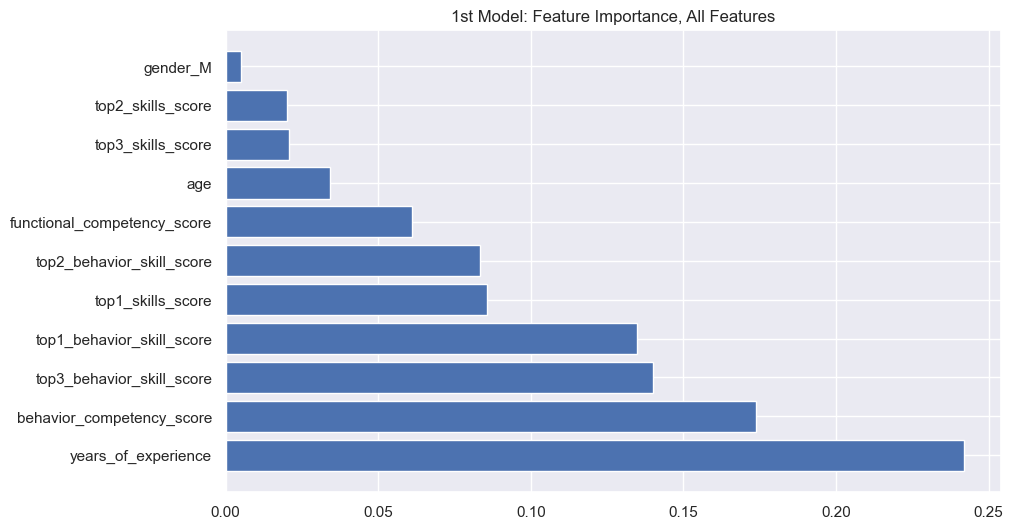

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(range(x_train.shape[1]), importances[sorted_indices], tick_label=x_train.columns[sorted_indices])
plt.xticks(rotation=0)
plt.title("1st Model: Feature Importance, All Features")
plt.show()

Interpretation:
- the story is becoming clearer
- top2 and top3 skills seem to be the worst performing of the HR tests
- years of experience, behaviour competency, and top3/1 behaviours are the best performers
- top1 skill, functional competency, and top2 behaviour are all edge cases

Solution:
- I will test another random forests:
    1. Omitting the clear poor performing features (gender, top3_skills, top_2skills, and age)
    2. Then another with the edge cases missing (top2_behaviour, functional_competency, and top1_skill)
- Assess the performance of the features

In [25]:
zero_keep = ['years_of_experience', 'behavior_competency_score', 'functional_competency_score','top1_skills_score','top2_skills_score','top3_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score']
x_train0 = x_train[zero_keep]
rf.fit(x_train0, y_train)
importances1 = rf.feature_importances_ #store the model
sorted_indices = np.argsort(importances1)[::-1] #sort model results in descending order

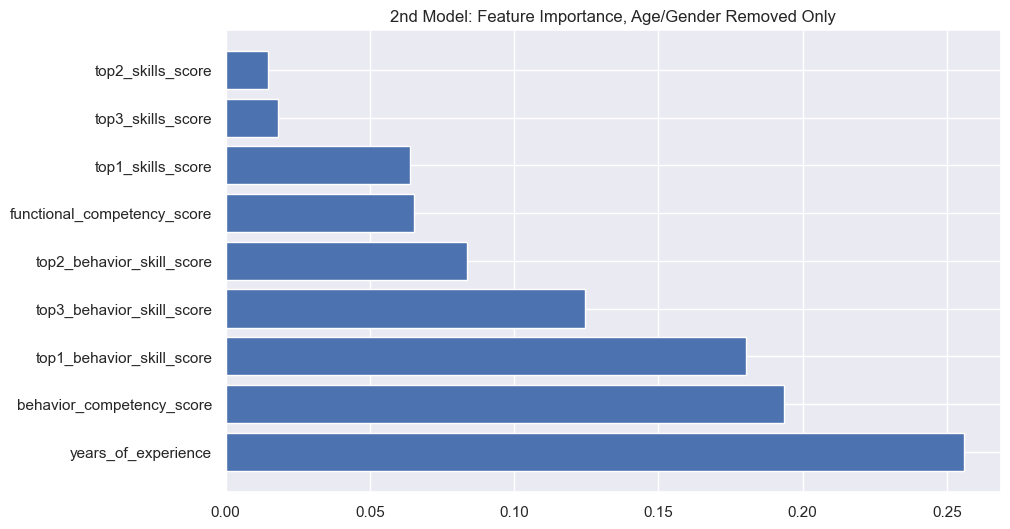

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(zero_keep)), importances1[sorted_indices], tick_label=np.array(zero_keep)[sorted_indices])
plt.xticks(rotation=0)
plt.title("2nd Model: Feature Importance, Age/Gender Removed Only")
plt.show()

In [27]:
first_keep = ['years_of_experience', 'behavior_competency_score', 'functional_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score']
x_train1 = x_train[first_keep]
rf.fit(x_train1, y_train)
importances1 = rf.feature_importances_ #store the model
sorted_indices = np.argsort(importances1)[::-1] #sort model results in descending order

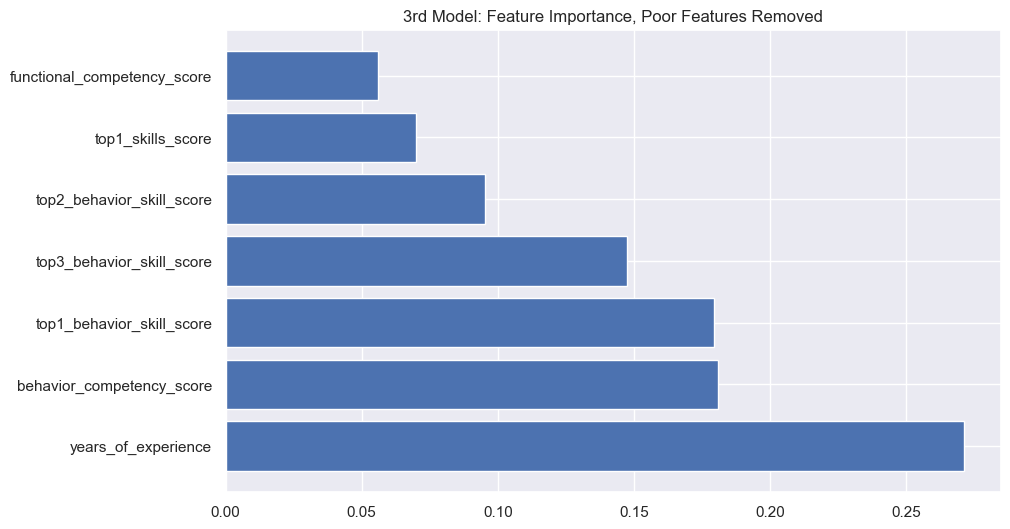

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(first_keep)), importances1[sorted_indices], tick_label=np.array(first_keep)[sorted_indices])
plt.xticks(rotation=0)
plt.title("3rd Model: Feature Importance, Poor Features Removed")
plt.show()

In [29]:
second_keep = ['years_of_experience', 'behavior_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score']
x_train2 = x_train[second_keep]
rf.fit(x_train2, y_train)
importances2 = rf.feature_importances_ #store the model
sorted_indices = np.argsort(importances2)[::-1] #sort model results in descending order

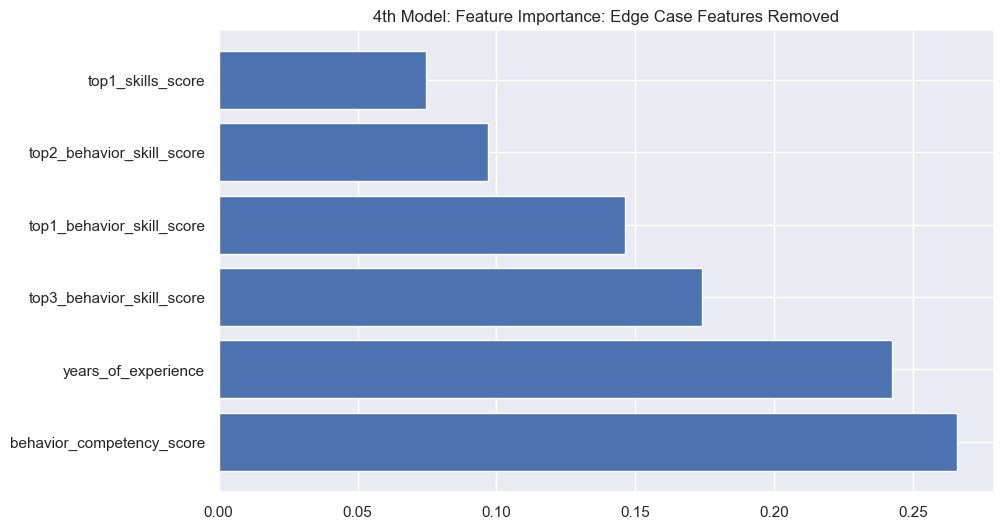

In [30]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(second_keep)), importances2[sorted_indices], tick_label=np.array(second_keep)[sorted_indices])
plt.xticks(rotation=0)
plt.title("4th Model: Feature Importance: Edge Case Features Removed")
plt.show()

Note: 
- x_train has all features.
- x_train0 has everything except gender/age = 'years_of_experience', 'behavior_competency_score', 'functional_competency_score','top1_skills_score','top2_skills_score','top3_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score'
- x_train1 all poor features dropped = 'years_of_experience', 'behavior_competency_score', 'functional_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score'
- x_train2 all edge features dropped = 'years_of_experience', 'behavior_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score'

Interpretation:
- years of experience, behaviour skills, and behaviour competency are important. The rest need some more evaluation. 

Thoughts:
- I want to keep at least one skill in the recruitment drive. Skills are important for jobs, and research shows they are quite predictive of later work performance.


## Random Forest: Hyperparamater Tweak
Performing a grid search on forest depth, which controls best for VIF and multicollinearity. 

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
} # Define the parameter grid

rf = RandomForestClassifier() # initialising the RandomForestClassifier and GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train) #fit the grid search to the data

best_params = grid_search.best_params_
print("Best Parameters:", best_params) #get the best parameters

best_rf = grid_search.best_estimator_ #get the best estimator
feature_importances = best_rf.feature_importances_ #get feature importances


#sort feature importances and get indices for each depth
for depth in param_grid['max_depth']: 
    # Filter best features for each depth
    if depth is None:
        print("\nFeatures for max_depth=None:")
    else:
        print(f"\nFeatures for max_depth={depth}:")
        
    #set the max_depth parameter
    best_rf.set_params(max_depth=depth)
    
    #fiting the model
    best_rf.fit(x_train, y_train)
    
    #feature importances
    feature_importances = best_rf.feature_importances_
    
    #sorting feature importances and get indices
    sorted_indices = np.argsort(feature_importances)[::-1]
    
    #print the top features
    for i, idx in enumerate(sorted_indices):
        print(f"{i+1}. {x_train.columns[idx]} ({feature_importances[idx]})")

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters: {'max_depth': 6}

Features for max_depth=None:
1. behavior_competency_score (0.23150963671060817)
2. years_of_experience (0.22318474658744164)
3. top3_behavior_skill_score (0.13697738362089826)
4. top1_behavior_skill_score (0.11691972695331816)
5. top1_skills_score (0.08987058535282191)
6. top2_behavior_skill_score (0.07339461480285675)
7. functional_competency_score (0.0518751195823812)
8. age (0.029291111548339705)
9. top3_skills_score (0.021441208395731676)
10. top2_skills_score (0.020178708148997374)
11. gender_M (0.005357158296605258)

Features for max_depth=2:
1. years_of_experience (0.33135484034022017)
2. behavior_competency_score (0.2032487731243307)
3. top1_behavior_skill_score (0.1624430065941333)
4. top3_behavior_skill_score (0.12060231731518303)
5. top2_behavior_skill_score (0.06525572983013553)
6. functional_competency_score (0.04076582364412439)
7. top1_skills_score (0.03783486628823374)
8. top

Interpretation:
- It looks like that even with hyperparamter of depth being tweaked, that the  same 5 - 7 features are at the top. 

The next with the Wald Test, will test the two models to see which features are significant, and overall model accuracy too. 

# Training Models & Wald Tests

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, brier_score_loss, matthews_corrcoef
from sklearn.model_selection import cross_val_predict, cross_val_score
#these are the comparison metrics I'll use to evaluate the training models using the two feature sets

## Model Comparisons: Logistic Regression

Note: 
- x_train0 = 'years_of_experience', 'behavior_competency_score', 'functional_competency_score','top1_skills_score','top2_skills_score','top3_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score'
- x_train1 = 'years_of_experience', 'behavior_competency_score', 'functional_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score'
- x_train2 = 'years_of_experience', 'behavior_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score'

In [33]:
log_reg1 = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg2 = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg0 = LogisticRegression(max_iter=1000, solver='liblinear')

# Cross-validated predictions and probabilities
y_pred1_cv = cross_val_predict(log_reg1, x_train1, y_train, cv=5)
y_prob1_cv = cross_val_predict(log_reg1, x_train1, y_train, cv=5, method='predict_proba')[:, 1]

y_pred2_cv = cross_val_predict(log_reg2, x_train2, y_train, cv=5)
y_prob2_cv = cross_val_predict(log_reg2, x_train2, y_train, cv=5, method='predict_proba')[:, 1]

y_pred0_cv = cross_val_predict(log_reg0, x_train0, y_train, cv=5)
y_prob0_cv = cross_val_predict(log_reg0, x_train0, y_train, cv=5, method='predict_proba')[:, 1]

# Cross-validated metrics
accuracy1 = accuracy_score(y_train, y_pred1_cv)
accuracy2 = accuracy_score(y_train, y_pred2_cv)
accuracy0 = accuracy_score(y_train, y_pred0_cv)

precision1 = precision_score(y_train, y_pred1_cv)
precision2 = precision_score(y_train, y_pred2_cv)
precision0 = precision_score(y_train, y_pred0_cv)

recall1 = recall_score(y_train, y_pred1_cv)
recall2 = recall_score(y_train, y_pred2_cv)
recall0 = recall_score(y_train, y_pred0_cv)

f1_score1 = f1_score(y_train, y_pred1_cv)
f1_score2 = f1_score(y_train, y_pred2_cv)
f1_score0 = f1_score(y_train, y_pred0_cv)

roc_auc1 = roc_auc_score(y_train, y_prob1_cv)
roc_auc2 = roc_auc_score(y_train, y_prob2_cv)
roc_auc0 = roc_auc_score(y_train, y_prob0_cv)

log_loss1 = log_loss(y_train, y_prob1_cv)
log_loss2 = log_loss(y_train, y_prob2_cv)
log_loss0 = log_loss(y_train, y_prob0_cv)

brier_score1 = brier_score_loss(y_train, y_prob1_cv)
brier_score2 = brier_score_loss(y_train, y_prob2_cv)
brier_score0 = brier_score_loss(y_train, y_prob0_cv)

mcc1 = matthews_corrcoef(y_train, y_pred1_cv)
mcc2 = matthews_corrcoef(y_train, y_pred2_cv)
mcc0 = matthews_corrcoef(y_train, y_pred0_cv)

# Wald test for coefficients
def wald_test(log_reg, x_train):
    logit_model = sm.Logit(y_train, sm.add_constant(x_train))
    result = logit_model.fit()
    wald_stats = result.tvalues ** 2
    return wald_stats

# Fit models to entire training data for Wald test (as cross_val_predict doesn't fit the model)
log_reg1.fit(x_train1, y_train)
log_reg2.fit(x_train2, y_train)
log_reg0.fit(x_train0, y_train)

wald_test1 = wald_test(log_reg1, x_train1)
wald_test2 = wald_test(log_reg2, x_train2)
wald_test0 = wald_test(log_reg0, x_train0)

# Ensure lists are the same length
max_len = max(len(wald_test0), len(wald_test1), len(wald_test2))

if len(wald_test0) < max_len:
    wald_test0 = np.pad(wald_test0, (0, max_len - len(wald_test0)), 'constant', constant_values=np.nan)

if len(wald_test1) < max_len:
    wald_test1 = np.pad(wald_test1, (0, max_len - len(wald_test1)), 'constant', constant_values=np.nan)

if len(wald_test2) < max_len:
    wald_test2 = np.pad(wald_test2, (0, max_len - len(wald_test2)), 'constant', constant_values=np.nan)

# Create a DataFrame to compare the results
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log-Loss', 'Brier Score', 'MCC'] + [f'Wald Test {i}' for i in range(max_len)],
    'Model 0': [accuracy0, precision0, recall0, f1_score0, roc_auc0, log_loss0, brier_score0, mcc0] + list(wald_test0),
    'Model 1': [accuracy1, precision1, recall1, f1_score1, roc_auc1, log_loss1, brier_score1, mcc1] + list(wald_test1),
    'Model 2': [accuracy2, precision2, recall2, f1_score2, roc_auc2, log_loss2, brier_score2, mcc2] + list(wald_test2)
})

comparison_df


Optimization terminated successfully.
         Current function value: 0.167002
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.176673
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.157314
         Iterations 10


,Metric,Model 0,Model 1,Model 2
0,Accuracy,0.916667,0.916667,0.920833
1,Precision,0.990566,0.990566,0.990654
2,Recall,0.846774,0.846774,0.854839
3,F1-Score,0.913043,0.913043,0.917749
4,ROC AUC,0.962945,0.962319,0.962667
5,Log-Loss,0.287570,0.286407,0.285878
6,Brier Score,0.080488,0.079686,0.079439
7,MCC,0.843448,0.843448,0.850755
8,Wald Test 0,18.828728,20.420675,26.274028
9,Wald Test 1,8.840714,9.932152,8.893267


## Model Comparisons: Logistic Regression Elastic Net
Elastic Net will help control for the high amounts of multicollinearity in the features

In [34]:
from sklearn.linear_model import LogisticRegressionCV
#package

In [35]:
# Define logistic regression models with elastic net regularization
log_reg_en0 = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=5000)
log_reg_en1 = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=5000)
log_reg_en2 = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=5000)

# Fit the models
log_reg_en0.fit(x_train0, y_train)
log_reg_en1.fit(x_train1, y_train)
log_reg_en2.fit(x_train2, y_train)

# Cross-validated predictions and probabilities
y_pred_en0_cv = cross_val_predict(log_reg_en0, x_train0, y_train, cv=5)
y_prob_en0_cv = cross_val_predict(log_reg_en0, x_train0, y_train, cv=5, method='predict_proba')[:, 1]

y_pred_en1_cv = cross_val_predict(log_reg_en1, x_train1, y_train, cv=5)
y_prob_en1_cv = cross_val_predict(log_reg_en1, x_train1, y_train, cv=5, method='predict_proba')[:, 1]

y_pred_en2_cv = cross_val_predict(log_reg_en2, x_train2, y_train, cv=5)
y_prob_en2_cv = cross_val_predict(log_reg_en2, x_train2, y_train, cv=5, method='predict_proba')[:, 1]

# Cross-validated metrics
accuracy_en0 = accuracy_score(y_train, y_pred_en0_cv)
accuracy_en1 = accuracy_score(y_train, y_pred_en1_cv)
accuracy_en2 = accuracy_score(y_train, y_pred_en2_cv)

precision_en0 = precision_score(y_train, y_pred_en0_cv)
precision_en1 = precision_score(y_train, y_pred_en1_cv)
precision_en2 = precision_score(y_train, y_pred_en2_cv)

recall_en0 = recall_score(y_train, y_pred_en0_cv)
recall_en1 = recall_score(y_train, y_pred_en1_cv)
recall_en2 = recall_score(y_train, y_pred_en2_cv)

f1_score_en0 = f1_score(y_train, y_pred_en0_cv)
f1_score_en1 = f1_score(y_train, y_pred_en1_cv)
f1_score_en2 = f1_score(y_train, y_pred_en2_cv)

roc_auc_en0 = roc_auc_score(y_train, y_prob_en0_cv)
roc_auc_en1 = roc_auc_score(y_train, y_prob_en1_cv)
roc_auc_en2 = roc_auc_score(y_train, y_prob_en2_cv)

log_loss_en0 = log_loss(y_train, y_prob_en0_cv)
log_loss_en1 = log_loss(y_train, y_prob_en1_cv)
log_loss_en2 = log_loss(y_train, y_prob_en2_cv)

brier_score_en0 = brier_score_loss(y_train, y_prob_en0_cv)
brier_score_en1 = brier_score_loss(y_train, y_prob_en1_cv)
brier_score_en2 = brier_score_loss(y_train, y_prob_en2_cv)

mcc_en0 = matthews_corrcoef(y_train, y_pred_en0_cv)
mcc_en1 = matthews_corrcoef(y_train, y_pred_en1_cv)
mcc_en2 = matthews_corrcoef(y_train, y_pred_en2_cv)

# Wald test for coefficients
def wald_test_en(log_reg, x_train):
    logit_model = sm.Logit(y_train, sm.add_constant(x_train))
    result = logit_model.fit()
    wald_stats = result.tvalues ** 2
    return wald_stats

# Fit models to entire training data for Wald test (as cross_val_predict doesn't fit the model)
log_reg_en0.fit(x_train0, y_train)
log_reg_en1.fit(x_train1, y_train)
log_reg_en2.fit(x_train2, y_train)

wald_test_en0 = wald_test_en(log_reg_en0, x_train0)
wald_test_en1 = wald_test_en(log_reg_en1, x_train1)
wald_test_en2 = wald_test_en(log_reg_en2, x_train2)

# Define variable names based on the features
variable_names = list(x_train0.columns)

# Ensure lists are the same length
max_len = max(len(wald_test_en0), len(wald_test_en1), len(wald_test_en2), len(variable_names))

if len(wald_test_en0) < max_len:
    wald_test_en0 = np.pad(wald_test_en0, (0, max_len - len(wald_test_en0)), 'constant', constant_values=np.nan)

if len(wald_test_en1) < max_len:
    wald_test_en1 = np.pad(wald_test_en1, (0, max_len - len(wald_test_en1)), 'constant', constant_values=np.nan)

if len(wald_test_en2) < max_len:
    wald_test_en2 = np.pad(wald_test_en2, (0, max_len - len(wald_test_en2)), 'constant', constant_values=np.nan)

# Create a DataFrame to compare the results
comparison_df_en = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log-Loss', 'Brier Score', 'MCC'] + [f'Wald Test {i}' for i in range(max_len)],
    'Model 0': [accuracy_en0, precision_en0, recall_en0, f1_score_en0, roc_auc_en0, log_loss_en0, brier_score_en0, mcc_en0] + list(wald_test_en0),
    'Model 1': [accuracy_en1, precision_en1, recall_en1, f1_score_en1, roc_auc_en1, log_loss_en1, brier_score_en1, mcc_en1] + list(wald_test_en1),
    'Model 2': [accuracy_en2, precision_en2, recall_en2, f1_score_en2, roc_auc_en2, log_loss_en2, brier_score_en2, mcc_en2] + list(wald_test_en2)
})

comparison_df_en

Optimization terminated successfully.
         Current function value: 0.157314
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.167002
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.176673
         Iterations 10


,Metric,Model 0,Model 1,Model 2
0,Accuracy,0.925000,0.920833,0.929167
1,Precision,0.956897,0.956522,0.965217
2,Recall,0.895161,0.887097,0.895161
3,F1-Score,0.925000,0.920502,0.928870
4,ROC AUC,0.969689,0.971635,0.967186
5,Log-Loss,0.209019,0.195405,0.204600
6,Brier Score,0.057669,0.057556,0.059477
7,MCC,0.852058,0.844257,0.860948
8,Wald Test 0,18.828728,20.420675,26.274028
9,Wald Test 1,8.840714,9.932152,8.893267


Interpretation:
- Model 2 seems to be the better performer across most metrics in both model types. 
- There seems to be no major difference for logistic regression or elastic net. 

Conclusions:
- I will test both elastic and logistic models on two feature sets (train/test1, train/test2).

# Model Testing

## x_train set up
Putting the correct features in the x_test feature sets

In [36]:
zero_keep = ['years_of_experience', 'behavior_competency_score', 'functional_competency_score','top1_skills_score','top2_skills_score','top3_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score']
x_test0 = x_test[zero_keep]

first_keep = ['years_of_experience', 'behavior_competency_score', 'functional_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score']
x_test1 = x_test[first_keep]

second_keep = ['years_of_experience', 'behavior_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score']
x_test2 = x_test[second_keep]

## Logistic Regression

In [37]:
# Test set predictions
y_test_pred0 = log_reg0.predict(x_test0)
y_test_pred1 = log_reg1.predict(x_test1)
y_test_pred2 = log_reg2.predict(x_test2)

y_test_prob0 = log_reg0.predict_proba(x_test0)[:, 1]
y_test_prob1 = log_reg1.predict_proba(x_test1)[:, 1]
y_test_prob2 = log_reg2.predict_proba(x_test2)[:, 1]

# Evaluate metrics for logistic regression models
metrics_log_reg = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log-Loss', 'Brier Score', 'MCC'],
    'Model 0': [
        accuracy_score(y_test, y_test_pred0),
        precision_score(y_test, y_test_pred0),
        recall_score(y_test, y_test_pred0),
        f1_score(y_test, y_test_pred0),
        roc_auc_score(y_test, y_test_prob0),
        log_loss(y_test, y_test_prob0),
        brier_score_loss(y_test, y_test_prob0),
        matthews_corrcoef(y_test, y_test_pred0)
    ],
    'Model 1': [
        accuracy_score(y_test, y_test_pred1),
        precision_score(y_test, y_test_pred1),
        recall_score(y_test, y_test_pred1),
        f1_score(y_test, y_test_pred1),
        roc_auc_score(y_test, y_test_prob1),
        log_loss(y_test, y_test_prob1),
        brier_score_loss(y_test, y_test_prob1),
        matthews_corrcoef(y_test, y_test_pred1)
    ],
    'Model 2': [
        accuracy_score(y_test, y_test_pred2),
        precision_score(y_test, y_test_pred2),
        recall_score(y_test, y_test_pred2),
        f1_score(y_test, y_test_pred2),
        roc_auc_score(y_test, y_test_prob2),
        log_loss(y_test, y_test_prob2),
        brier_score_loss(y_test, y_test_prob2),
        matthews_corrcoef(y_test, y_test_pred2)
    ]
}

log_reg_results_df = pd.DataFrame(metrics_log_reg)

# Display the results for logistic regression models, with training model printed below 
log_reg_results_df, comparison_df

(        Metric   Model 0   Model 1   Model 2
 0     Accuracy  0.916667  0.900000  0.900000
 1    Precision  1.000000  1.000000  1.000000
 2       Recall  0.857143  0.828571  0.828571
 3     F1-Score  0.923077  0.906250  0.906250
 4      ROC AUC  0.957714  0.955429  0.956571
 5     Log-Loss  0.288901  0.294901  0.294855
 6  Brier Score  0.083374  0.085121  0.085079
 7          MCC  0.845154  0.817437  0.817437,
          Metric    Model 0    Model 1    Model 2
 0      Accuracy   0.916667   0.916667   0.920833
 1     Precision   0.990566   0.990566   0.990654
 2        Recall   0.846774   0.846774   0.854839
 3      F1-Score   0.913043   0.913043   0.917749
 4       ROC AUC   0.962945   0.962319   0.962667
 5      Log-Loss   0.287570   0.286407   0.285878
 6   Brier Score   0.080488   0.079686   0.079439
 7           MCC   0.843448   0.843448   0.850755
 8   Wald Test 0  18.828728  20.420675  26.274028
 9   Wald Test 1   8.840714   9.932152   8.893267
 10  Wald Test 2   2.737360   2.941

Interpretation:
- Model 0 is showing the strongest performance.
- The overall drop between training and testing F1 scores shows that there may be overfitting in this model. 

## Elastic Net Logistic Regression

In [38]:
# Initialize elastic net logistic regression models
log_reg_en0 = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=5000)
log_reg_en1 = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=5000)
log_reg_en2 = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=5000)

# Fit the models
log_reg_en0.fit(x_train0, y_train)
log_reg_en1.fit(x_train1, y_train)
log_reg_en2.fit(x_train2, y_train)

# Test set predictions
y_test_pred_en0 = log_reg_en0.predict(x_test0)
y_test_pred_en1 = log_reg_en1.predict(x_test1)
y_test_pred_en2 = log_reg_en2.predict(x_test2)

y_test_prob_en0 = log_reg_en0.predict_proba(x_test0)[:, 1]
y_test_prob_en1 = log_reg_en1.predict_proba(x_test1)[:, 1]
y_test_prob_en2 = log_reg_en2.predict_proba(x_test2)[:, 1]

# Evaluate metrics for elastic net logistic regression models
metrics_log_reg_en = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log-Loss', 'Brier Score', 'MCC'],
    'Model 0': [
        accuracy_score(y_test, y_test_pred_en0),
        precision_score(y_test, y_test_pred_en0),
        recall_score(y_test, y_test_pred_en0),
        f1_score(y_test, y_test_pred_en0),
        roc_auc_score(y_test, y_test_prob_en0),
        log_loss(y_test, y_test_prob_en0),
        brier_score_loss(y_test, y_test_prob_en0),
        matthews_corrcoef(y_test, y_test_pred_en0)
    ],
    'Model 1': [
        accuracy_score(y_test, y_test_pred_en1),
        precision_score(y_test, y_test_pred_en1),
        recall_score(y_test, y_test_pred_en1),
        f1_score(y_test, y_test_pred_en1),
        roc_auc_score(y_test, y_test_prob_en1),
        log_loss(y_test, y_test_prob_en1),
        brier_score_loss(y_test, y_test_prob_en1),
        matthews_corrcoef(y_test, y_test_pred_en1)
    ],
    'Model 2': [
        accuracy_score(y_test, y_test_pred_en2),
        precision_score(y_test, y_test_pred_en2),
        recall_score(y_test, y_test_pred_en2),
        f1_score(y_test, y_test_pred_en2),
        roc_auc_score(y_test, y_test_prob_en2),
        log_loss(y_test, y_test_prob_en2),
        brier_score_loss(y_test, y_test_prob_en2),
        matthews_corrcoef(y_test, y_test_pred_en2)
    ]
}

log_reg_en_results_df = pd.DataFrame(metrics_log_reg_en)

# Display the results for elastic net logistic regression models, testing models first with training model below 
print("Elastic Net Logistic Regression Model Evaluation")
log_reg_en_results_df, comparison_df_en

Elastic Net Logistic Regression Model Evaluation


(        Metric   Model 0   Model 1   Model 2
 0     Accuracy  0.883333  0.900000  0.916667
 1    Precision  0.966667  1.000000  0.968750
 2       Recall  0.828571  0.828571  0.885714
 3     F1-Score  0.892308  0.906250  0.925373
 4      ROC AUC  0.968000  0.962286  0.962286
 5     Log-Loss  0.250164  0.254791  0.240206
 6  Brier Score  0.077223  0.069235  0.064981
 7          MCC  0.777542  0.817437  0.835745,
          Metric    Model 0    Model 1    Model 2
 0      Accuracy   0.925000   0.920833   0.929167
 1     Precision   0.956897   0.956522   0.965217
 2        Recall   0.895161   0.887097   0.895161
 3      F1-Score   0.925000   0.920502   0.928870
 4       ROC AUC   0.969689   0.971635   0.967186
 5      Log-Loss   0.209019   0.195405   0.204600
 6   Brier Score   0.057669   0.057556   0.059477
 7           MCC   0.852058   0.844257   0.860948
 8   Wald Test 0  18.828728  20.420675  26.274028
 9   Wald Test 1   8.840714   9.932152   8.893267
 10  Wald Test 2   2.737360   2.941

### Interpretation:
- Model 2 is clearly the strongest model. It shows good F1 scores, and doesn't have a big drop in performance compared to the training model. 

### Conclusion:
For the recruitment scenario, using the Elastic Net with the features (Model 2): 'years_of_experience', 'behavior_competency_score','top1_skills_score','top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score' will yield the best results for predicting interview call-backs, and help augment human decision making in the recruitment office. 